In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
plt.figure(figsize= (20,10))
sns.heatmap(train.corr().abs(), annot=True)

In [4]:
corr = train.corr().abs()

C:\Users\Braulio\AppData\Local\Temp\ipykernel_9328\3928212264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr().abs()


In [6]:
corr_SP = corr.loc[:,['SalePrice']] #para sacar las correlaciones de esta
corr_SP.sort_values(ascending=False, by = 'SalePrice')

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

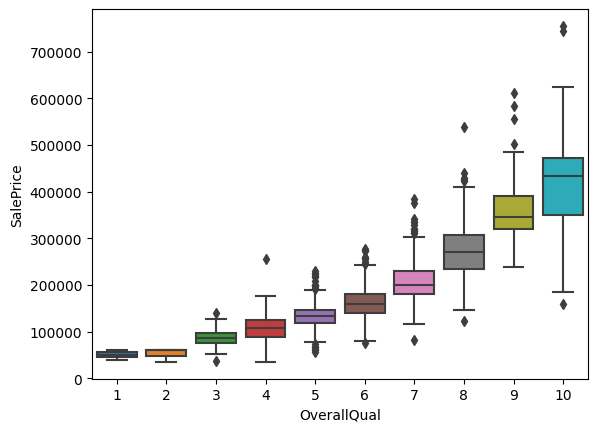

In [7]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train);

In [13]:
#las variables con más de 0,5 de correlación
train_selec = train.loc[:,['SalePrice','OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd']]

<Axes: >

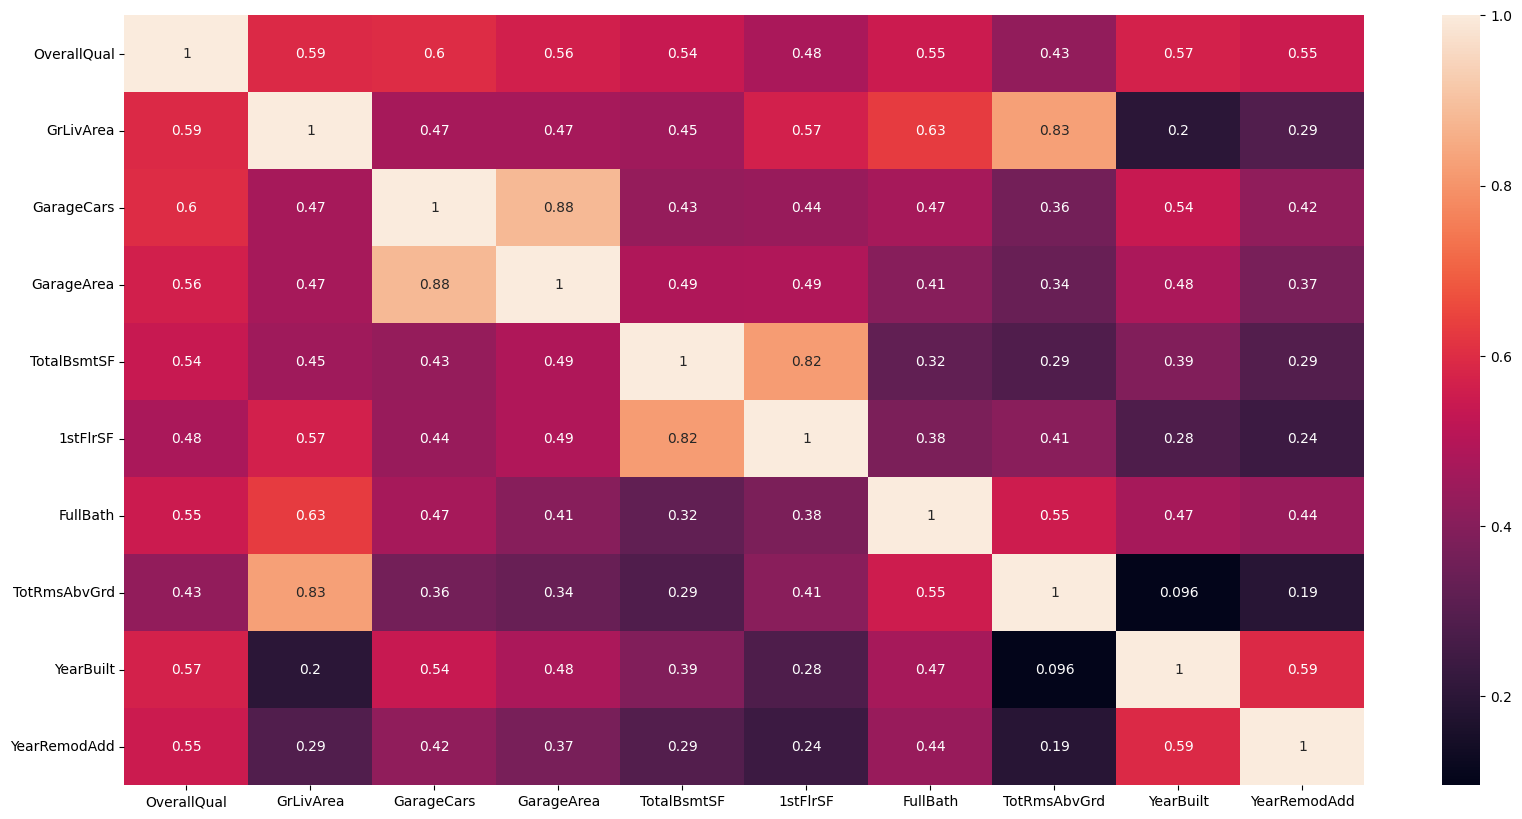

In [9]:
plt.figure(figsize= (20,10))
sns.heatmap(train_selec.corr().abs(), annot=True)

In [14]:
#segundo recorte de variables
train_selec_2 = train_selec.loc[:,['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt','YearRemodAdd']]

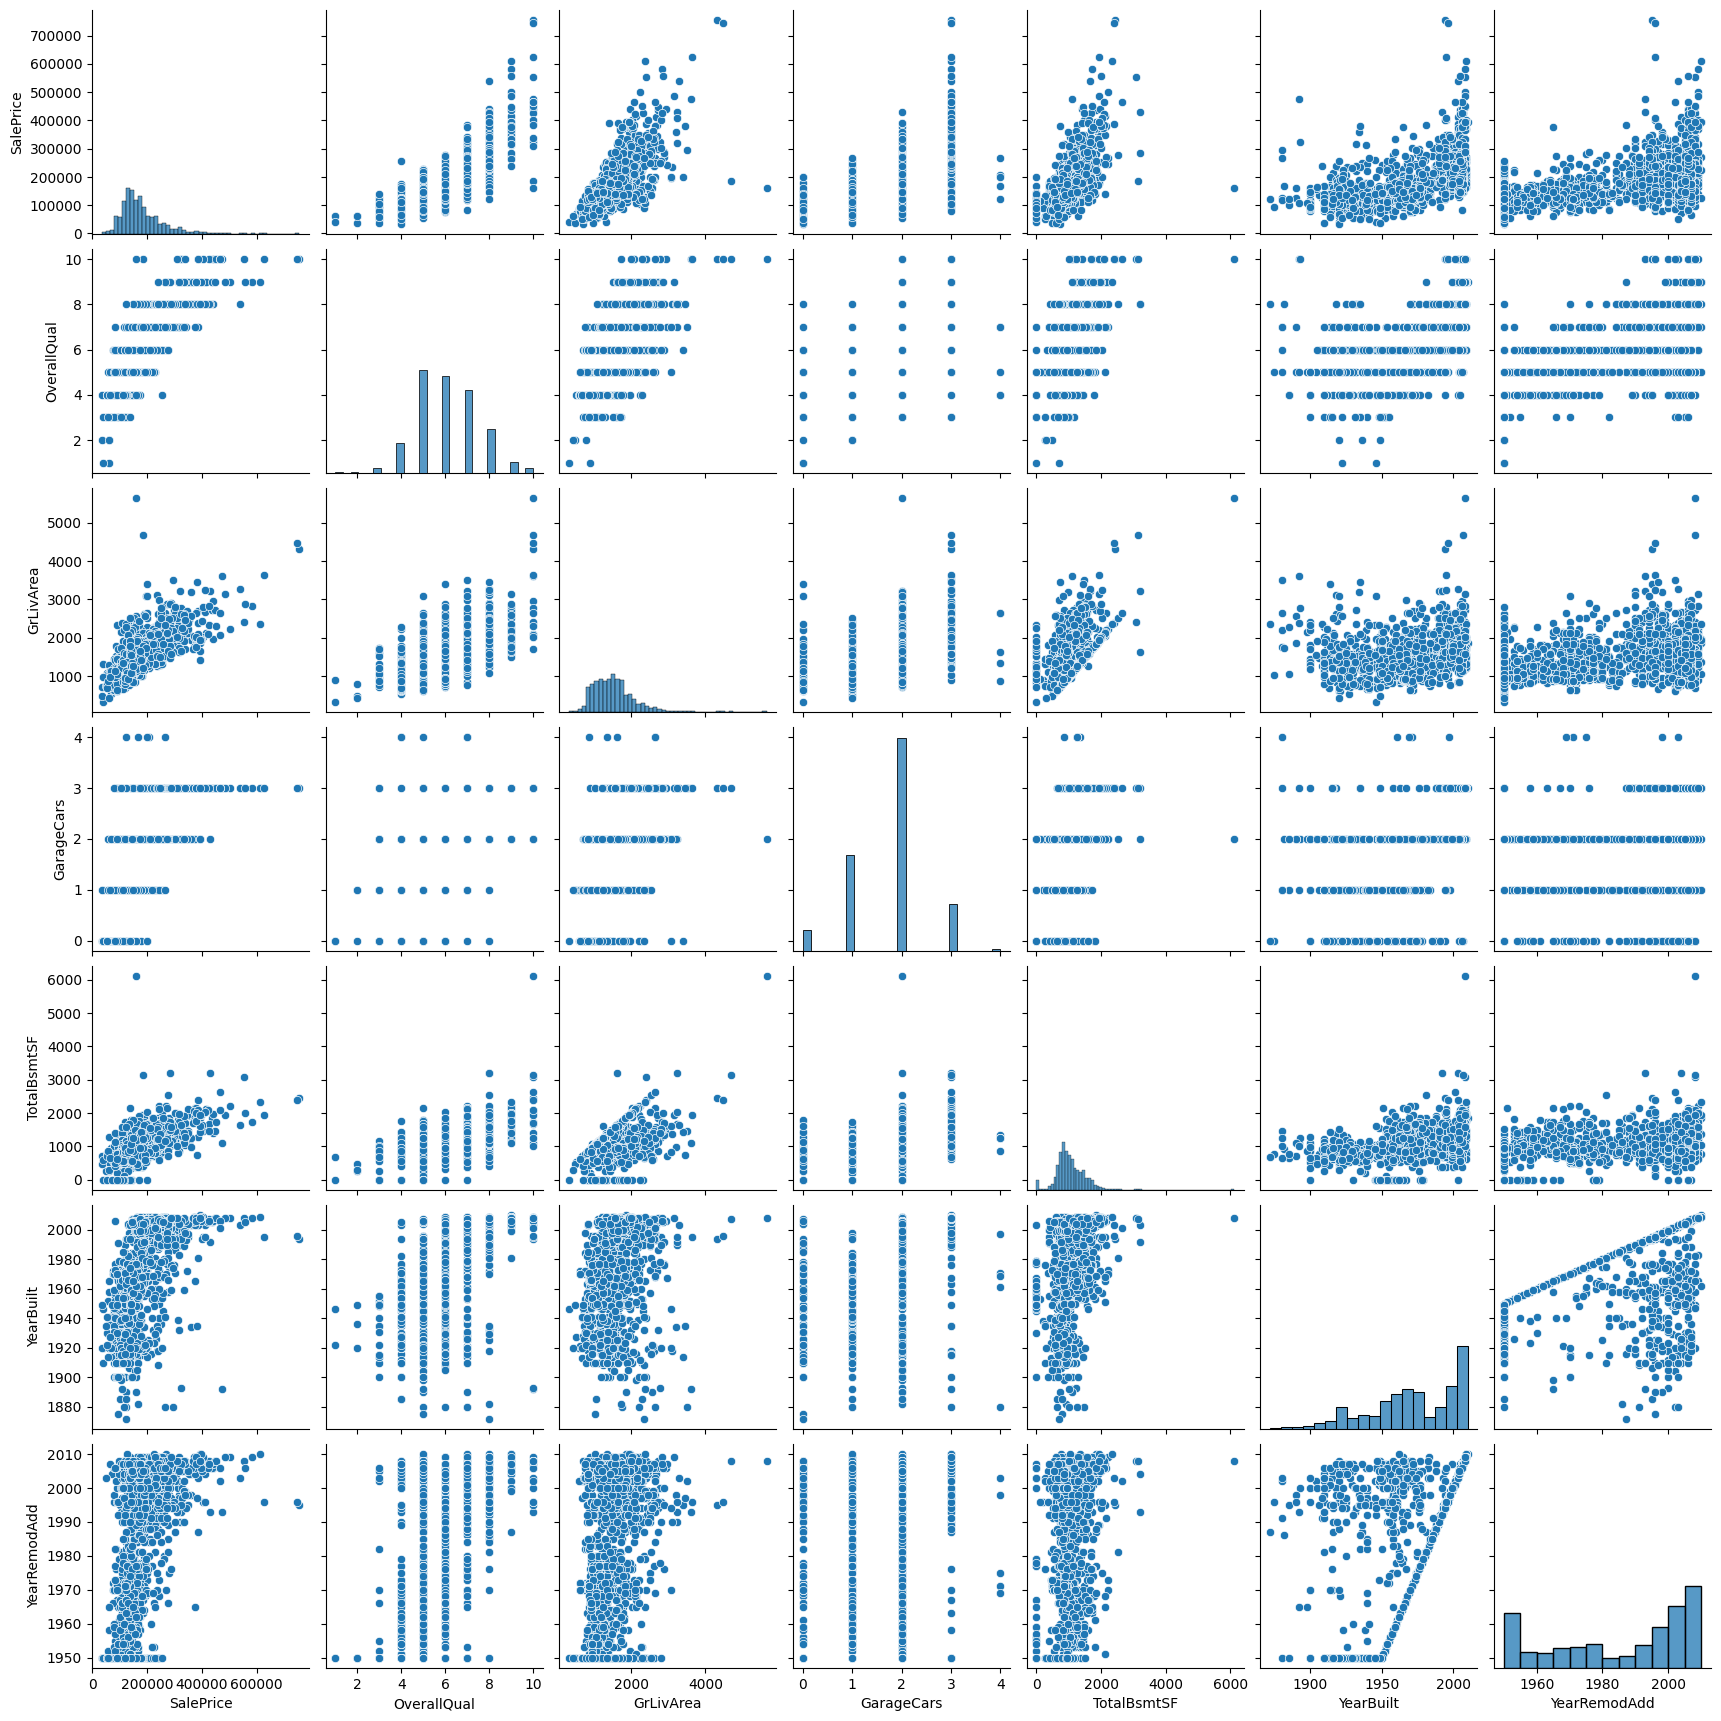

In [15]:
sns.pairplot(train_selec_2);

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = train.loc[:,['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt','YearRemodAdd']]
y=train.loc[:,['SalePrice']]

In [ ]:
#?train_test_split #para copiar lo de abajo

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
print(lm.intercept_)

[-1099624.78138854]


In [23]:
lm.coef_

array([[19436.90877887,    43.67490507, 16735.52372284,    23.40676256,
          219.67814787,   306.03756758]])

In [24]:
predicciones = lm.predict(X_test)

In [25]:
#para unirlo al dataframe final
DTpredicciones = pd.DataFrame(predicciones)
DTpredicciones.reset_index(drop=True, inplace=True) #para que nos quiten los indices
y_test.reset_index(drop=True, inplace=True) #aqui tambien
df_unido = y_test.join(DTpredicciones) #unir

In [26]:
df_unido

,SalePrice,0
0,154500,149386.207296
1,325000,286684.405177
2,115000,119615.676742
3,159000,171129.761054
4,315500,289603.748817
...,...,...
477,135000,111365.248440
478,119000,108313.841750
479,215000,225432.551723
480,133500,108965.237919


In [27]:
#Métricas
from sklearn import metrics

In [28]:
print("MAE", metrics.mean_absolute_error(y_test, predicciones))
print("MSE", metrics.mean_squared_error(y_test, predicciones))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE 24582.305134592618
MSE 1537855915.4515247
RMSE 39215.50605884775


C:\Users\Braulio\AppData\Local\Temp\ipykernel_9328\4051192154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[:,['SalePrice']]);


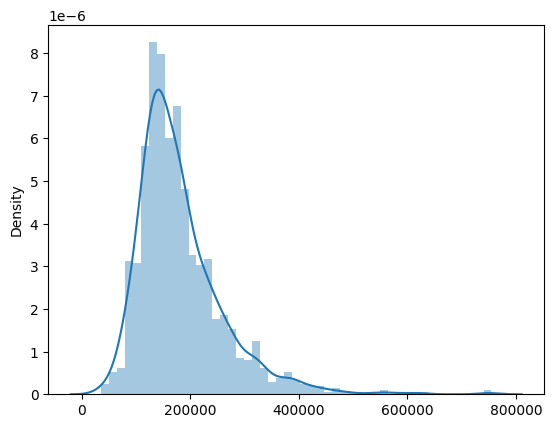

In [32]:
sns.distplot(train.loc[:,['SalePrice']]);

In [34]:
from sklearn.metrics import mean_squared_log_error
#métrica que usa Kaggle para compararte con competidores
print("Log RMSE", np.sqrt(metrics.mean_squared_log_error(y_test, predicciones)))

Log RMSE 0.24275110499034117


In [ ]:
#lo de arriba no es para entregar, hay que entregarlo todo

In [35]:
test = pd.read_csv('test.csv')

In [ ]:
X = test.loc[:,['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt','YearRemodAdd']]
#y=train.loc[:,['SalePrice']]

In [36]:
X.isna().sum() #esto es para chekear

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [37]:
X['GarageCars'].fillna(0, inplace=True) #y esto

In [38]:
X['TotalBsmtSF'].mean() 

1057.4294520547944

In [40]:
X['TotalBsmtSF'].fillna(X['TotalBsmtSF'].mean(), inplace=True)

In [41]:
predicciones = lm.predict(X)

In [42]:
#para hacer el dataframe final
DTpredicciones = pd.DataFrame(predicciones)
DTpredicciones.reset_index(drop=True, inplace=True) #para que nos quiten los indices
id = test.loc[:, ['Id']]
id.reset_index(drop=True, inplace=True)
df_entrega = id.join(DTpredicciones) #unir

In [43]:
df_entrega.head()

,Id,0
0,1461,217633.481970
1,1462,173939.037000
2,1463,221705.413696
3,1464,202903.137031
4,1465,280306.675381


In [44]:
df_entrega.columns = ['Id', 'SalePrice'] #para cambiar las columnas

In [45]:
df_entrega.head()

,Id,SalePrice
0,1461,217633.481970
1,1462,173939.037000
2,1463,221705.413696
3,1464,202903.137031
4,1465,280306.675381


In [46]:
df_entrega.to_csv('sample_submission.csv', index=False) #para pasar el dataframe a csv